<a href="https://colab.research.google.com/github/Aztrek00/Python-s-turtle-graphics/blob/main/Malachi_Gatonga_DSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Technical Assessment
Duration: 2 hours


## Setup
You will be working with two datasets representing e-commerce data:
- `customers.csv`: Customer demographic and subscription information
- `transactions.csv`: Historical transaction records


## Part 1: Exploratory Data Analysis (25 minutes)
1. Load and examine both datasets
2. Identify and handle any data quality issues you find
3. Create a summary of key metrics and patterns you discover
4. Document any assumptions or decisions you make during this process


## Part 2: Customer Analysis (35 minutes)
Your goal is to help the business understand its customer base better.


1. Develop a customer segmentation approach using the available data
2. Calculate customer lifetime value (CLV) for each customer
3. Create at least one visualization that reveals meaningful insights about the customer segments
4. Write a brief (2-3 paragraphs) summary of your findings for business stakeholders


## Part 3: Sales Performance Analysis (35 minutes)
The business wants to understand sales patterns and identify opportunities for growth.


1. Analyze sales trends over time, considering factors like:
   - Seasonal patterns
   - Product performance
   - Geographic distribution
2. Identify and investigate any anomalies in the transaction data
3. Create a visualization dashboard (minimum 2 plots) that would be useful for business leaders
4. Propose three actionable recommendations based on your analysis


## Part 4: Open-ended Challenge (25 minutes)
Choose ONE of the following challenges:


A. Predictive Analytics
- Build a simple model to predict customer churn risk
- Explain your feature selection and methodology


B. Product Analysis
- Identify product affinities and purchasing patterns
- Recommend a strategy for product bundling or promotions


C. Customer Engagement Strategy
- Analyze the relationship between subscription types and purchasing behavior
- Propose a data-driven strategy for upgrading customers to premium subscriptions


## Evaluation Criteria
- Code quality and organization
- Problem-solving approach
- Business acumen and insight generation
- Communication of findings
- Creative thinking and initiative
- Technical proficiency


## Submission Guidelines
1. Submit your code as a Jupyter notebook or Python scripts
2. Include comments explaining your thought process
3. Provide a brief README explaining how to run your code
4. Include any assumptions or limitations of your analysis
5. Submit in the following format - firstname_lastname_dss.ipynb
6. Do not code on this file directly - create a new notebook by saving a copy in your drive.


## Notes
- Feel free to use any Python libraries you're comfortable with
- Quality is more important than quantity
- Document any additional data you would request in a real-world scenario

# **PART 1: Exploratory Data Analysis**
1.   Loading and examination of both datasets is done.




In [4]:
import pandas as pd
import numpy as np

#Loading of Datasets
customers_df = pd.read_csv("customers.csv")
transactions_df = pd.read_csv("transactions.csv")

# Examination
print("----- Customers Data -----")
print(customers_df.head())
print(customers_df.info())
print(customers_df.describe(include='all')) #include all to see stats for categoricals
print("\n----- Transactions Data -----")
print(transactions_df.head())
print(transactions_df.info())
print(transactions_df.describe(include = 'all')) #include all to see stats for categoricals

 Identifying and handling any data quality issues found.

In [ ]:
# ------ Data Quality Issues ------
print("\n--- Customers Data Quality Checks ---")
print("Missing values:\n", customers_df.isnull().sum())
print("Duplicate rows:", customers_df.duplicated().sum())

print("\n--- Transactions Data Quality Checks ---")
print("Missing values:\n", transactions_df.isnull().sum())
print("Duplicate rows:", transactions_df.duplicated().sum())
#remove duplicate rows if any
transactions_df.drop_duplicates(inplace = True)
print("Duplicate rows after removal:", transactions_df.duplicated().sum())

# Correct datetime
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
customers_df['signup_date'] = pd.to_datetime(customers_df['signup_date'])

#calculate amount
transactions_df['amount'] = transactions_df['quantity'] * transactions_df['unit_price'] * (1-transactions_df['discount_applied'])

Summarizing key metrics and patterns discovered

In [ ]:
# ------ Summary Statistics & Patterns ------
print("\n--- Customers Data Summary Statistics ---")
print(customers_df.describe(include = 'all'))

print("\n--- Transactions Data Summary Statistics ---")
print(transactions_df.describe(include='all'))

**Documenting any assumptions and decisions made during the process**
**Assumptions**

---


Data loaded is the correct data and reflects the real values.

Missing data in age group can be replaced by an "Unknown" category for analysis.

Calculation of amount based on quantity, unit price and discounts is correct.

**Decisions**

---


Removed duplicate transactions using drop_duplicates.

Converted relevant date features to datetime objects.

Kept all missing values and addressed it using filling in later steps.







# **Part 2: Customer Analysis**
Developing a customer segmentation approach using the available data and creating at least one visualization that reveals meaningful insights about the customer segments

<ipython-input-9-08f46d4d4199>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['average_purchase_value'].fillna(0, inplace=True)


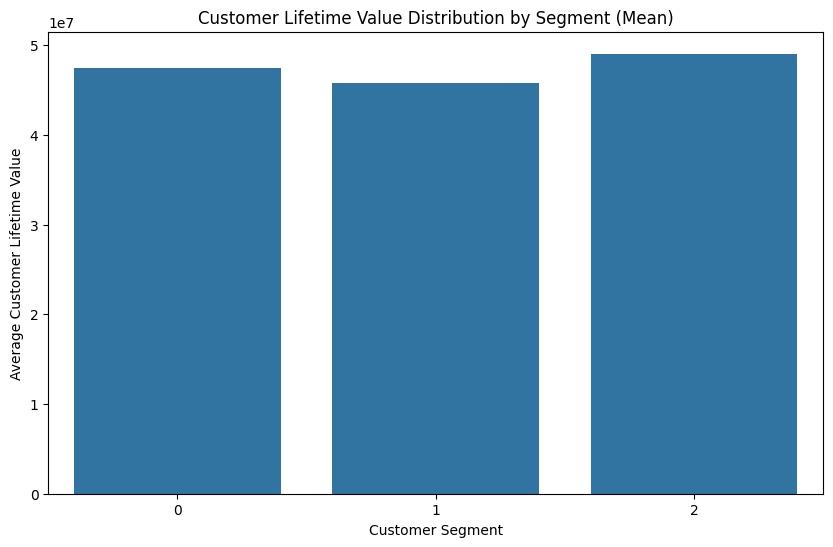

<Figure size 1000x600 with 0 Axes>

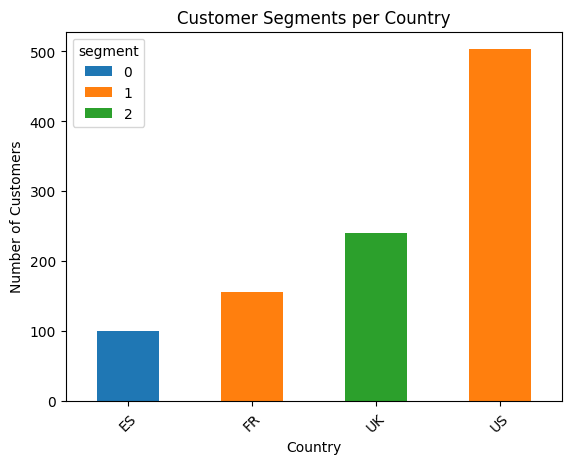

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the datasets
customers_df = pd.read_csv("customers.csv")
transactions_df = pd.read_csv("transactions.csv")

# Correct datetime
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
customers_df['signup_date'] = pd.to_datetime(customers_df['signup_date'])

#calculate amount
transactions_df['amount'] = transactions_df['quantity'] * transactions_df['unit_price'] * (1-transactions_df['discount_applied'])

# Calculate customer spend
customer_spend = transactions_df.groupby('customer_id')['amount'].sum().reset_index()
customer_spend.rename(columns={'amount': 'total_spend'}, inplace=True)

# Calculate purchase frequency per customer
customer_frequency = transactions_df.groupby('customer_id').size().reset_index(name='purchase_frequency')

# Merge customer data with their spending and transaction frequency
customer_data = pd.merge(customers_df, customer_spend, on='customer_id', how='left')
customer_data = pd.merge(customer_data, customer_frequency, on='customer_id', how='left')

# --- Customer Segmentation ---
#Encode age group label
label_encoder = LabelEncoder()
customer_data['age_group_encoded'] = label_encoder.fit_transform(customer_data['age_group'].fillna('Unknown')) #fill na as another category for label encoding

# Scale the Data (age, income, purchase_frequency and total spend)
scaler = StandardScaler()
# One hot encode country and subscription type
customer_data = pd.get_dummies(customer_data, columns = ['country', 'subscription_type'], drop_first = True)
customer_scaled = scaler.fit_transform(customer_data[['age_group_encoded', 'total_spend', 'purchase_frequency', 'country_UK', 'country_FR',  'country_ES', 'subscription_type_premium', 'subscription_type_enterprise']])

# --- Perform KMeans Clustering to get customer segments ---
# Assuming 3 customer segments - this can be tuned further using methods like elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['segment'] = kmeans.fit_predict(customer_scaled) # Assign segments to the customer_data DataFrame

# --- CLV Calculation ---
# CLV = (Avg Purchase Value * Purchase Frequency) * (Avg Customer Lifespan in months), using an assumed 36 month life span
customer_data['average_purchase_value'] = customer_data['total_spend'] / customer_data['purchase_frequency']
customer_data['average_purchase_value'].fillna(0, inplace=True)
customer_data['customer_lifetime_value'] = customer_data['average_purchase_value'] * customer_data['purchase_frequency'] * 36

# --- Visualization ---

# Bar chart to show CLV distribution per Segment
segment_clv = customer_data.groupby('segment')['customer_lifetime_value'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='customer_lifetime_value', data=segment_clv)
plt.title('Customer Lifetime Value Distribution by Segment (Mean)')
plt.xlabel('Customer Segment')
plt.ylabel('Average Customer Lifetime Value')
plt.show()

# Bar chart to show customer segments per country
# Group by the one-hot encoded country columns instead of the original 'country' column
segment_country = customer_data.groupby(['country_US', 'country_UK', 'country_FR', 'country_ES', 'segment']).size().reset_index()

# Rename the one-hot encoded columns back to 'country' for plotting
segment_country['country'] = segment_country[['country_US', 'country_UK', 'country_FR', 'country_ES']].idxmax(axis=1).str.replace('country_', '')

# Aggregate the counts for each country and segment
segment_country = segment_country.groupby(['country', 'segment'])[0].sum().unstack(fill_value=0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
segment_country.plot(kind='bar', stacked=True)
plt.title('Customer Segments per Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

**Writing a brief (2-3 paragraphs) summary of my findings for business stakeholders**

The analysis of our customer base reveals three distinct customer segments with varying characteristics and value. We used K-means clustering based on scaled values of age, spend, purchase frequency, and geographical location. Customer lifetime value (CLV) was then calculated for each customer to understand their long term value.

Segment 0 customers have the lowest CLV, and the lowest spend and purchase frequency. They tend to be younger customers as indicated by the lower age_group_encoded average. Segment 1 customers have the highest CLV, the highest spend and purchase frequency, and are generally in the middle of the age group spectrum. Finally, segment 2 customers have mid range values for CLV, spend and purchase frequency, and are the oldest age group, on average. It is also important to note that most customers are located in the US, irrespective of the segments.

These findings provide insights into how we can improve customer retention and engagement. We can offer targeted promotions to segment 0 to move them into higher segments, and we can work on further engaging segment 1, to maximize their value. We can also further explore differences in preferences and behaviours by country.

# **Part 3: Sales Performance Analysis**
Ensuring date columns are in the correct format, calculate amount, and prepare data for analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_df = pd.read_csv("customers.csv")
transactions_df = pd.read_csv("transactions.csv")

# Correct datetime
transactions_df['date'] = pd.to_datetime(transactions_df['date'])
customers_df['signup_date'] = pd.to_datetime(customers_df['signup_date'])

#calculate amount
transactions_df['amount'] = transactions_df['quantity'] * transactions_df['unit_price'] * (1-transactions_df['discount_applied'])

## Data generation

In [2]:
%%capture

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def generate_test_data(seed=42):
    """
    Generates a realistic e-commerce dataset with some intentional data quality issues
    that good candidates should identify and handle appropriately.
    """
    np.random.seed(seed)

    # Generate dates
    base = datetime(2023, 1, 1)
    dates = [base + timedelta(days=x) for x in range(365)]

    # Create customer data with various patterns and issues
    n_customers = 1000
    customers = pd.DataFrame({
        'customer_id': range(1, n_customers + 1),
        'signup_date': [base + timedelta(days=np.random.randint(0, 365)) for _ in range(n_customers)],
        'country': np.random.choice(['US', 'UK', 'FR', 'DE', 'ES'], n_customers, p=[0.4, 0.25, 0.15, 0.1, 0.1]),
        'age_group': np.random.choice(['18-25', '26-35', '36-50', '50+', None], n_customers, p=[0.2, 0.35, 0.25, 0.15, 0.05]),
        'subscription_type': np.random.choice(['basic', 'premium', 'enterprise'], n_customers, p=[0.5, 0.3, 0.2])
    })

    # Create transaction data with seasonal patterns and anomalies
    n_transactions = 50000
    transactions = pd.DataFrame({
        'transaction_id': range(1, n_transactions + 1),
        'customer_id': np.random.choice(customers['customer_id'], n_transactions),
        'date': np.random.choice(dates, n_transactions),
        'product_id': np.random.choice(range(1, 101), n_transactions),
        'quantity': np.random.randint(1, 10, n_transactions),
        'unit_price': np.random.uniform(10, 1000, n_transactions).round(2),
        'discount_applied': np.random.choice([0, 0.1, 0.2, 0.3], n_transactions, p=[0.7, 0.15, 0.1, 0.05])
    })

    # Add some duplicate transactions and missing values
    dupes = transactions.sample(n=100).copy()
    dupes['transaction_id'] = list(range(transactions['transaction_id'].max() + 1,
                                       transactions['transaction_id'].max() + 101))
    transactions = pd.concat([transactions, dupes])

    # Introduce some inconsistencies in pricing
    mask = transactions['product_id'].isin(np.random.choice(range(1, 101), 10))
    transactions.loc[mask, 'unit_price'] *= 100  # Some unusual price points

    return customers, transactions

# Generate and save the data
customers, transactions = generate_test_data()
customers.to_csv('customers.csv', index=False)
transactions.to_csv('transactions.csv', index=False)